Инициализируем зависимости и датасет картинок. Проведем преобразование палитры из 255 в диапазон от 0 до 1 и преобразуем значения Y в категории.

In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

X_train = X_train / 255
X_test = X_test / 255

feathures_count = class_names.shape[0]

y_train = tf.keras.utils.to_categorical(y_train, feathures_count)
y_test = tf.keras.utils.to_categorical(y_test, feathures_count)

Создадим первую полносвязную нейронную сеть и выведем её структуру

In [2]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(32, 32, 3), name='Input_Layer'))
model.add(tf.keras.layers.Flatten(name='Flatten_Layer'))
model.add(tf.keras.layers.Dense(512, activation='relu', name='Hidden_Layer_1'))
model.add(tf.keras.layers.Dense(256, activation='relu', name='Hidden_Layer_2'))
model.add(tf.keras.layers.Dense(feathures_count, activation='softmax', name='Output_Layer'))

sgd = SGD(learning_rate = 0.01)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten_Layer (Flatten)     (None, 3072)              0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 512)               1573376   
                                                                 
 Hidden_Layer_2 (Dense)      (None, 256)               131328    
                                                                 
 Output_Layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


Обучим сеть и предскажем категории с выводом точности

In [3]:
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)
y_pred = model.predict(X_test)
print('Accuracy: %s' % accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 1.9230 - accuracy: 0.3162 - val_loss: 1.8337 - val_accuracy: 0.3437
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 1.7496 - accuracy: 0.3857 - val_loss: 1.7493 - val_accuracy: 0.3796
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 1.6734 - accuracy: 0.4103 - val_loss: 1.7146 - val_accuracy: 0.3864
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 1.6224 - accuracy: 0.4310 - val_loss: 1.6852 - val_accuracy: 0.3989
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 1.5819 - accuracy: 0.4407 - val_loss: 1.6068 - val_accuracy: 0.4370
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 1.5471 - accuracy: 0.4574 - val_loss: 1.5978 - val_accuracy: 0.4343
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 1.5185 - accuracy: 0.4653 - val_loss: 1.5846 - val_accuracy: 0.4385
Epoch 

Создадим сверточную нейронную сеть и выведем её структуру

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(32, 32, 3), name='Input_Layer'))
model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu', name='Unlinear_Layer_1'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(tf.keras.layers.Flatten(name='Flatten_Layer'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu', name='Unlinear_Layer_2'))
model.add(tf.keras.layers.Dense(feathures_count, activation='softmax', name='Output_Layer'))

sgd = SGD(learning_rate = 0.01)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 10)        280       
                                                                 
 Unlinear_Layer_1 (Dense)    (None, 32, 32, 32)        352       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 Flatten_Layer (Flatten)     (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 100)               819300    
                                                                 
 Unlinear_Layer_2 (Dense)    (None, 10)                1010      
                                                      

Обучим CNN и предскажем категории с выводом точности

In [5]:
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)
y_pred = model.predict(X_test)
print('Accuracy: %s' % accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Epoch 1/10
625/625 [==============================] - 27s 43ms/step - loss: 2.1970 - accuracy: 0.1635 - val_loss: 2.1403 - val_accuracy: 0.1769
Epoch 2/10
625/625 [==============================] - 28s 44ms/step - loss: 2.0343 - accuracy: 0.2422 - val_loss: 1.9470 - val_accuracy: 0.3007
Epoch 3/10
625/625 [==============================] - 29s 46ms/step - loss: 1.8899 - accuracy: 0.3207 - val_loss: 1.8140 - val_accuracy: 0.3492
Epoch 4/10
625/625 [==============================] - 38s 61ms/step - loss: 1.7636 - accuracy: 0.3697 - val_loss: 1.6860 - val_accuracy: 0.3986
Epoch 5/10
625/625 [==============================] - 34s 54ms/step - loss: 1.6567 - accuracy: 0.4051 - val_loss: 1.6028 - val_accuracy: 0.4236
Epoch 6/10
625/625 [==============================] - 28s 46ms/step - loss: 1.5681 - accuracy: 0.4384 - val_loss: 1.5373 - val_accuracy: 0.4469
Epoch 7/10
625/625 [==============================] - 28s 45ms/step - loss: 1.5024 - accuracy: 0.4609 - val_loss: 1.5660 - val_accuracy:

Далее создадим большую CNN, с несколькими сверточными слоями и softmax, а так-же промежуточными полносвязными слоями. Выведем структуру.

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(2, 2),
                           padding='same',
                           activation='relu',
                           input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3), padding='valid'),
    tf.keras.layers.Conv2D(filters=128, 
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=256, 
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 128)       1664      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 128)       147584    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 5, 5, 256)         295168    
                                                                 
 flatten_8 (Flatten)         (None, 6400)            

Обучим сеть и выведем точность.

In [23]:
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)
y_pred = model.predict(X_test)
print('Accuracy: %s' % accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Epoch 1/10
625/625 [==============================] - 37s 59ms/step - loss: 1.5024 - accuracy: 0.4498 - val_loss: 1.1938 - val_accuracy: 0.5819
Epoch 2/10
625/625 [==============================] - 39s 62ms/step - loss: 1.0464 - accuracy: 0.6309 - val_loss: 0.9469 - val_accuracy: 0.6678
Epoch 3/10
625/625 [==============================] - 37s 60ms/step - loss: 0.8594 - accuracy: 0.6978 - val_loss: 0.9082 - val_accuracy: 0.6803
Epoch 4/10
625/625 [==============================] - 37s 59ms/step - loss: 0.7296 - accuracy: 0.7465 - val_loss: 0.8078 - val_accuracy: 0.7163
Epoch 5/10
625/625 [==============================] - 36s 57ms/step - loss: 0.6247 - accuracy: 0.7818 - val_loss: 0.7933 - val_accuracy: 0.7287
Epoch 6/10
625/625 [==============================] - 37s 59ms/step - loss: 0.5322 - accuracy: 0.8140 - val_loss: 0.8022 - val_accuracy: 0.7315
Epoch 7/10
625/625 [==============================] - 37s 59ms/step - loss: 0.4321 - accuracy: 0.8498 - val_loss: 0.7884 - val_accuracy:

Для демонстрации угадывания выведем картинки с предсказанными классами.

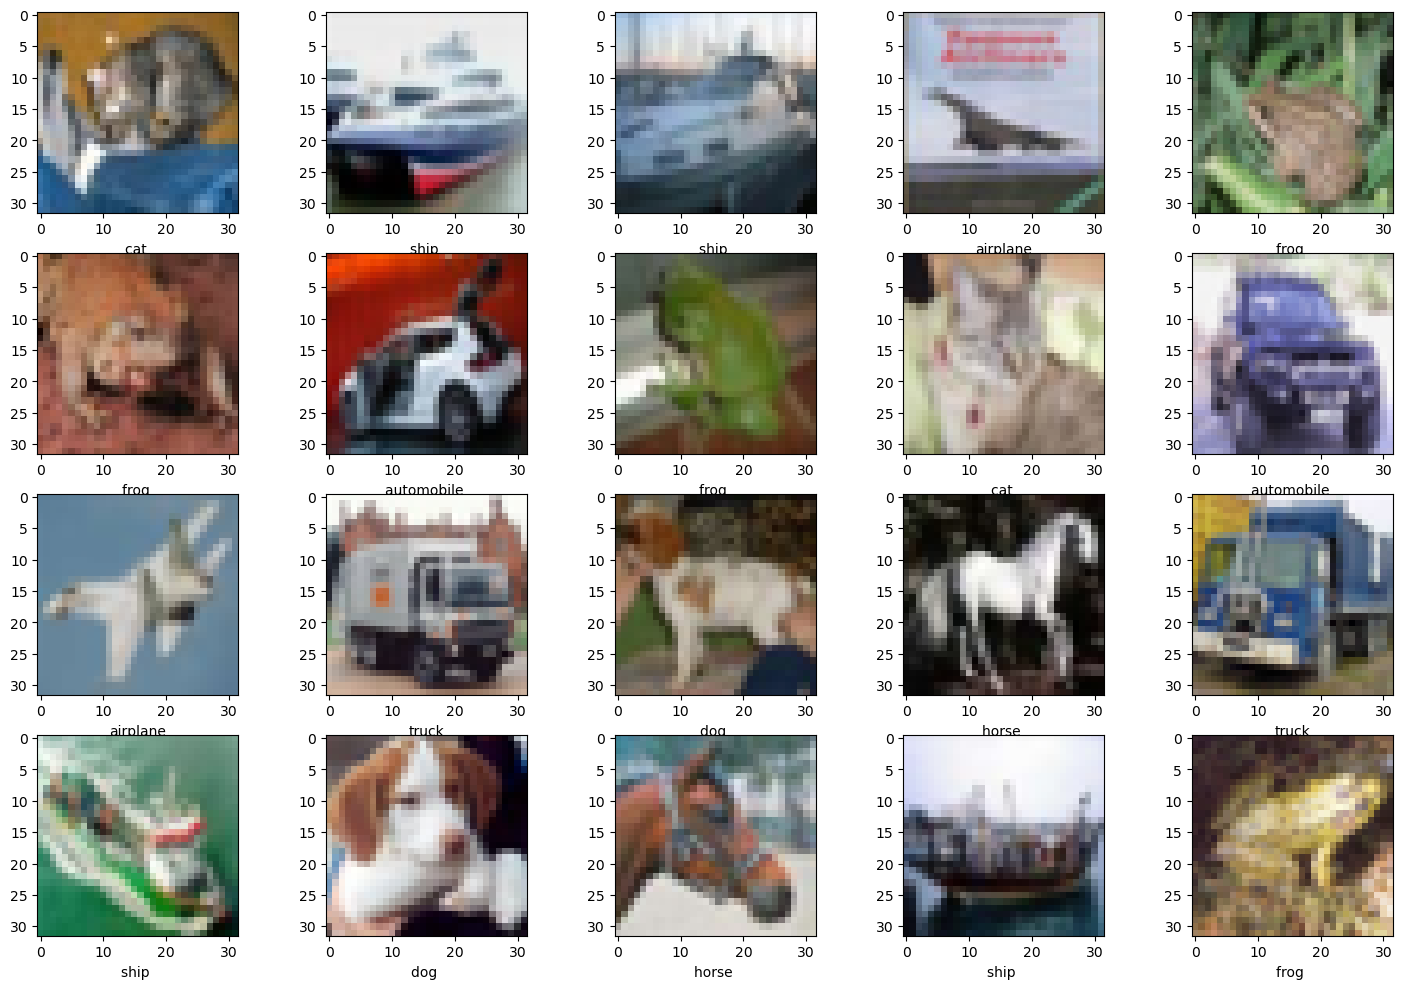

In [26]:
plt.figure(figsize=[18,12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xlabel(class_names[np.argmax(y_pred[i])])
    plt.imshow(X_test[i])

Угаданы все картинки на данной воборке.